In [7]:
import networkx as nx

In [5]:
G = nx.Graph([(0, 1), (0, 2), (1, 2)])
H = nx.Graph([(0, 1), (0, 3), (1, 3), (1, 2)])
U = nx.union(G, H, rename=("G", "H"))
G.nodes
# U.nodes
# U.edges


NodeView((0, 1, 2))

In [20]:
import numpy as np
G = nx.Graph([(0, 1), (0, 2), (1, 2)])
H = nx.Graph([('s0', 's3'), ('s1', 's2'), ('s2', 's3')])
H.add_node('s4', tag="ff")
for i, node in enumerate(H.nodes):
    print(node)
U = nx.disjoint_union(G, H)
incidence = nx.incidence_matrix(G=U, oriented=True).toarray().astype(np.int32)
print(incidence)
print(type(incidence))
[x for x in U.nodes]

s0
s3
s1
s2
s4
[[-1 -1  0  0  0  0]
 [ 1  0 -1  0  0  0]
 [ 0  1  1  0  0  0]
 [ 0  0  0 -1  0  0]
 [ 0  0  0  1 -1  0]
 [ 0  0  0  0  0 -1]
 [ 0  0  0  0  1  1]
 [ 0  0  0  0  0  0]]
<class 'numpy.ndarray'>


[0, 1, 2, 3, 4, 5, 6, 7]

In [36]:
G = nx.complete_graph(4)
paths = nx.all_simple_paths(G, source=0, target=3)
# for path in map(nx.utils.pairwise, paths):
#     print(list(path))
p = list(map(nx.utils.pairwise, paths))
print(list(p[0]))

[(0, 1), (1, 2), (2, 3)]


In [28]:
G = nx.DiGraph()
G.add_edge("x", "a", capacity=3.0)
G.add_edge("x", "b", capacity=1.0)
G.add_edge("a", "c", capacity=3.0)
G.add_edge("b", "c", capacity=5.0)
G.add_edge("b", "d", capacity=4.0)
G.add_edge("d", "e", capacity=2.0)
G.add_edge("c", "y", capacity=2.0)
G.add_edge("e", "y", capacity=3.0)
print(G)
cut_value = nx.minimum_cut_value(G, "x", "y")
cut_value

DiGraph with 7 nodes and 8 edges


3.0

In [12]:
a = 0.0006
print(a)
a = 0.0000000006
print(a)
import numpy as np
a = np.format_float_positional(a, trim='-')
print(a, type(a))

0.0006
6e-10
0.0000000006 <class 'str'>


In [17]:
import copy
a = [1, 2, 3, 4, 5, 6]
# [a[i] for i in range(5)]
f = [(lambda x: x + a[i]) for i in range(5)]
print(len(f))
for i in range(5):
    print(i, f[i](i))

[1, 2, 3, 4, 5]

In [1]:
import numpy as np
from sko.GA import GA

def schaffer(p):
    '''
    This function has plenty of local minimum, with strong shocks
    global minimum at (0,0) with value 0
    '''
    x1, x2 = p
    x = np.square(x1) + np.square(x2)
    return 0.5 + (np.square(np.sin(x)) - 0.5) / np.square(1 + 0.001 * x)

ga = GA(func=schaffer, n_dim=2, size_pop=50, max_iter=800, prob_mut=0.001, lb=[-1, -1], ub=[1, 1], precision=1e-7)
best_x, best_y = ga.run()
print('best_x:', best_x, '\n', 'best_y:', best_y)

best_x: [ 2.98023233e-08 -3.27825556e-07] 
 best_y: [0.]


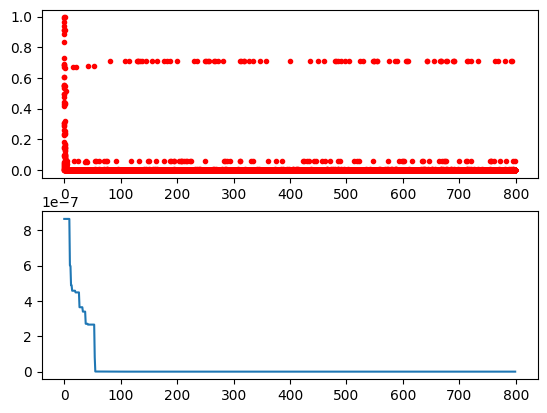

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

Y_history = pd.DataFrame(ga.all_history_Y)
fig, ax = plt.subplots(2, 1)
ax[0].plot(Y_history.index, Y_history.values, '.', color='red')
Y_history.min(axis=1).cummin().plot(kind='line')
plt.show()